# Author: Aditya Trivedi
# Data analysis using pandas and matplotlib for visualization

Project: Answering the below questions from the given dataset

    Which are the most selling products?
    Which are the Top 10 products by sales?
    Which are the most profitable products?
    What category sold the most?
    Which are the most profitable category?
    Total sales values by category and subcategory
    Which are the most selling products in subcategory?   

Reference for the data and above questions : https://github.com/sedabasaran/Sales-Analysis

# Libraries used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig

# Reading the files

In [2]:
# reading the excel file
file=pd.read_excel('superstore_sales.xlsx') 

In [3]:
file.head(4) # returns the desired number of rows instead of entire rows

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011


# Exploratory Data Analysis

In [4]:
# Let's do an EDA to see if any missing or null values exist
file.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [5]:
file.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
product_names=file['product_name'].unique()

In [7]:
#for i in product_names:
    #print(i)

# Top 10 most selling products

In [8]:
# show top 5 most selling products
a=file.groupby('product_name').agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False)[:5]

# here aggregate function is used to calculate the sum of the quantity for each product category and returns a result

In [9]:
a

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259


### Thus staples are the most selling product among all 

# Top 10 profitable products

In [10]:
b = file.groupby('product_name').agg({'profit':'sum'}).sort_values(by='profit',ascending=False)[:10]

<AxesSubplot:xlabel='product_name'>

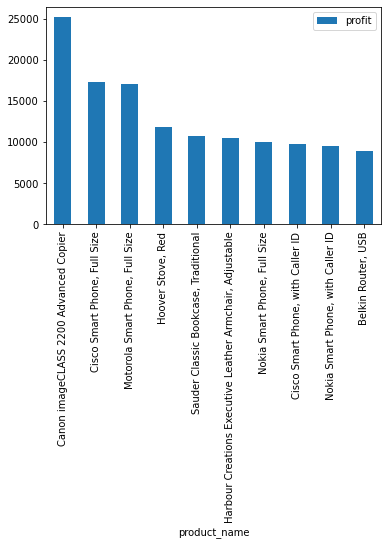

In [11]:
b.plot(kind='bar')
#plt.xticks(rotation=45)

### Thus Cannon imageCLASS 2000 Advanced Copier provides the highest share of profit among all products however Staples was the most volume product

# Top 10 categories that sold most products

In [12]:
cat = file.groupby('category').agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False)
cat

,quantity
category,
Office Supplies,108182
Technology,35176
Furniture,34954


<AxesSubplot:xlabel='category'>

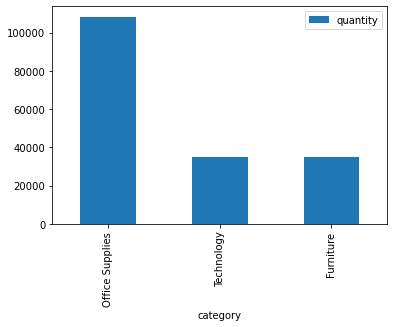

In [13]:
cat.plot(kind='bar') #visualization of the dataframe to see which category sold most

### From the above bar chart it is observed that the category of Office Supplies sold the most quantity of products

# Top 10 most profitable categories

In [14]:
cat_profit=file.groupby('category').agg({'profit':'sum'}).sort_values(by='profit',ascending=False).round(0).astype(int)
cat_profit

# the values were rounded and the order of applying the rounding does not matter, i.e it can be before or after the sort
# values function

,profit
category,
Technology,663779
Office Supplies,518474
Furniture,286782


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

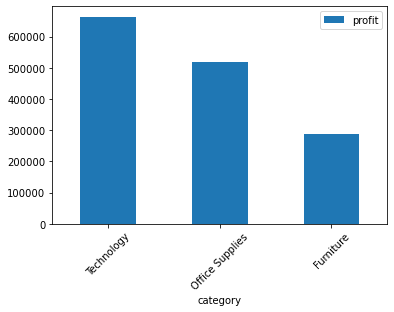

In [15]:
cat_profit.plot(kind='bar')
plt.xticks(rotation=45)
plt.yticks() # tomorrow practice to show the y_axis as thousands instead

# Total sales volume by category and subcategory

In [16]:
sales=file.groupby(['category','sub_category']).agg({'sales':'sum'}).sort_values(by='sales',ascending=False).reset_index()
sales
# so here sales will output as dataframe instead of series object since reset_index used at the end which will 
# convert to a new dataframe

,category,sub_category,sales
0,Technology,Phones,1.706824e+06
1,Technology,Copiers,1.509436e+06
2,Furniture,Chairs,1.501682e+06
3,Furniture,Bookcases,1.466572e+06
4,Office Supplies,Storage,1.127086e+06
5,Office Supplies,Appliances,1.011064e+06
6,Technology,Machines,7.790601e+05
7,Furniture,Tables,7.570419e+05
8,Technology,Accessories,7.492370e+05
9,Office Supplies,Binders,4.619115e+05


In [17]:
sales.columns

Index(['category', 'sub_category', 'sales'], dtype='object')

In [18]:
sales_plot=sales.pivot('sub_category','category','sales').sort_values(by=['Furniture','Office Supplies','Technology'],ascending=True)
#since the pivot changes the columns, sorted it by the respective sales vols of the categories

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

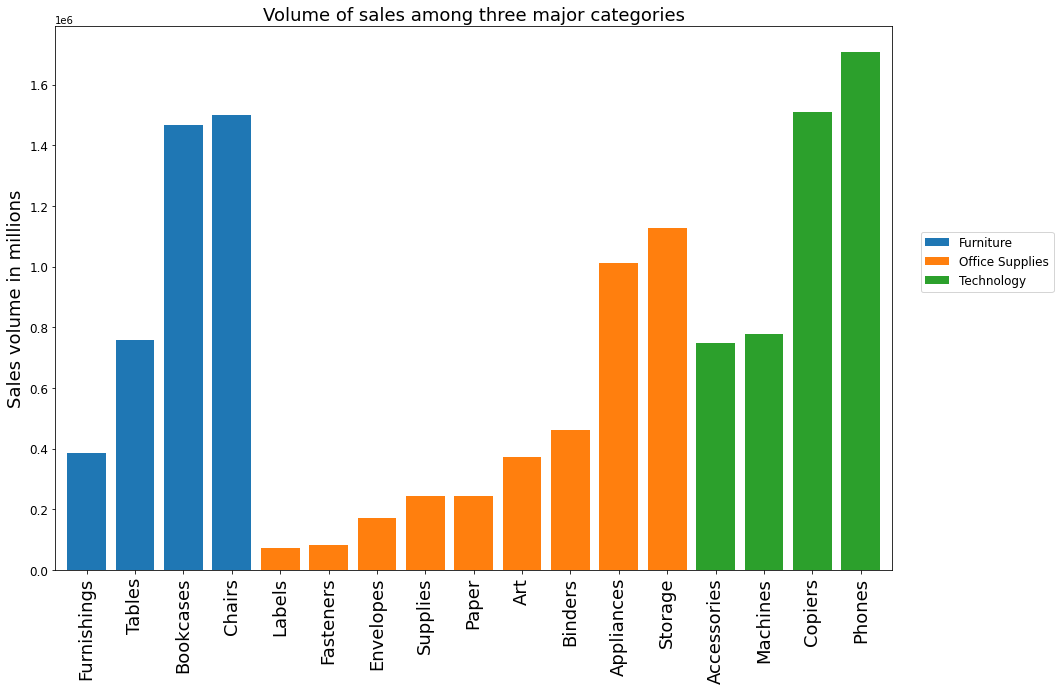

In [19]:
sales_plot.plot(kind='bar',fontsize=10,figsize=(15,10),width=0.8,stacked=True)
plt.show
plt.legend(loc=4,bbox_to_anchor=(1.2,0.5),fontsize=12) #bbox_to_anchor helps to move legend position to (x,y)
plt.title('Volume of sales among three major categories',fontsize=18)
plt.ylabel('Sales volume in millions',fontsize=18)
plt.xlabel('')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)

### As observed from the above figure, the highest sales were for the category technology (phones)

In [20]:
# lets look at top 10 most selling prods by vol in respective subcategory
most_sell_prod=file.groupby(['product_name','sub_category']).agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False)[:10].reset_index()

In [21]:
most_sell_prod

,product_name,sub_category,quantity
0,"Cardinal Index Tab, Clear",Binders,337
1,"Eldon File Cart, Single Width",Storage,321
2,"Rogers File Cart, Single Width",Storage,262
3,"Sanford Pencil Sharpener, Water Color",Art,259
4,"Stockwell Paper Clips, Assorted Sizes",Fasteners,253
5,"Avery Index Tab, Clear",Binders,252
6,"Ibico Index Tab, Clear",Binders,251
7,"Smead File Cart, Single Width",Storage,250
8,"Stanley Pencil Sharpener, Water Color",Art,242
9,"Acco Index Tab, Clear",Binders,228


In [22]:
most_sell_prod[:2]

,product_name,sub_category,quantity
0,"Cardinal Index Tab, Clear",Binders,337
1,"Eldon File Cart, Single Width",Storage,321


In [33]:
most_sell_prod.pivot('sub_category','product_name','quantity')

product_name,"Acco Index Tab, Clear","Avery Index Tab, Clear","Cardinal Index Tab, Clear","Eldon File Cart, Single Width","Ibico Index Tab, Clear","Rogers File Cart, Single Width","Sanford Pencil Sharpener, Water Color","Smead File Cart, Single Width","Stanley Pencil Sharpener, Water Color","Stockwell Paper Clips, Assorted Sizes"
sub_category,,,,,,,,,,
Art,NaN,NaN,NaN,NaN,NaN,NaN,259.0,NaN,242.0,NaN
Binders,228.0,252.0,337.0,NaN,251.0,NaN,NaN,NaN,NaN,NaN
Fasteners,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.0
Storage,NaN,NaN,NaN,321.0,NaN,262.0,NaN,250.0,NaN,NaN


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

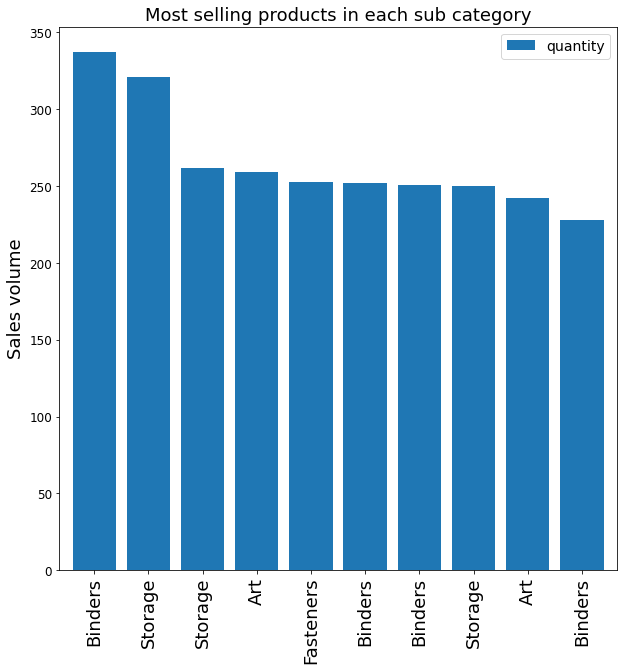

In [43]:
most_sell_prod.plot(kind='bar',fontsize=10,figsize=(10,10),width=0.8,stacked=True,x='sub_category')
plt.show
plt.legend(loc=1,fontsize=14) #bbox_to_anchor helps to move legend position to (x,y)
plt.title('Most selling products in each sub category',fontsize=18)
plt.ylabel('Sales volume',fontsize=18)
plt.xlabel('')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)

### As observed from the above the chart, Binders were sold the most with Storage items at second highest volume

# End of analysis